# 分析「好勁稻工作室（搶救嘉禾新村）」臉專PO文資訊
## 目的
* 分析其所關注的面向、及行動面向
* 了解該組織再行動時所接觸到的單位
* 了解臉書粉專'搶救' 的意思為何

## 觀察
* 根據文字雲可以觀察到該粉專關注的面向為文化，文資的保存，也就是嘉禾新村的保存運動
* 文字雲當中有出現柯文哲、台北等字眼，所以台北市府可能為該團體在進行運動時，所需要常接觸的政府單位
* 臉書粉專名稱'搶救'的意思，可能為捍衛該村落的拆除，而不是該村落被以不當方式運用


In [20]:
% matplotlib inline
import numpy as np
import pandas as pd
import json

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import jieba.analyse
import requests
from bs4 import BeautifulSoup
import facebook
from collections import Counter
from PIL import Image

In [3]:
#透過套件facebook 抓取facebook 粉專ID資訊

token = 'EAACEdEose0cBAOOVe2Ql21LEAlj1WotyXkhuUlsUEUpZBZB9SNGaLmyTZCZClWlcVZBA6vk7yxIBUqFOm38fpch4tHXYrxRWMsrEWGwE36sIxYT7TReiwwKMHAOIihWEqcgYzZA56AswiW7ifBinR5xxhQlZCUT5UlRIDUuJ8DVQqKZAbjVZBkGQUnh8OvpN69iTP4pECWzn5GgZDZD'

graph = facebook.GraphAPI(access_token = token) 
fanpage_info = graph.get_object('JiaHeStudio', field = 'id')  

#print(fanpage_info)  
#print("Fanpage id = ", fanpage_info['id'])

In [4]:
#抓取facebook 粉專PO文資訊
posts = graph.get_connections(id = '290813577773327', connection_name = 'posts', summary = True)


In [5]:
j=json.dumps(posts, ensure_ascii=False) #dict to int
jsondata = json.loads(j)  # int to dict


In [6]:

for i in range(5):
    posts=[]
    
    #抓取每一篇POST資訊
    #有些PO文屬於分享文無法用jsondata['data'][x]["message"]抓取，故使用try 除錯
    for x in range(len(jsondata['data'])):    
        try :
            posts.append( jsondata['data'][x]["message"] )  #下一頁
        except:
            None
    
    #將抓取到的POST資訊藉由pandas套件存成文字檔
    df = pd.DataFrame.from_dict(posts)
    filename = str(i)+".txt"
    df.to_csv(filename, sep=',', index=False)    
    
    nextsite = jsondata['paging']['next']  #找出下一頁POST資訊的網址
    response = requests.get(nextsite)      
    jsondata = json.loads(response.text) 


In [7]:
#讀取先前存下來的POST檔案，並存成list
posts = []
for i in range(5):
    filename = str(i)+".txt"
    f = open(filename, 'r')
    x = f.readlines()
    posts.append(x)
    
flat_list = []
flat_list = [item for sublist in posts for item in sublist]   #list of list to list

In [8]:
demo_text = ''.join(flat_list)  #convert to str

In [9]:
jieba.add_word('柯文哲')  

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\chenhur\AppData\Local\Temp\jieba.cache
Loading model cost 1.309 seconds.
Prefix dict has been built succesfully.


In [10]:
stopwords = ['我', '對', '\n', '的', '與','及', '在', '讓', '也', '於']
puncs = '\/！？｡＂＃＄％＆＇，（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

seg_list = jieba.cut(demo_text, cut_all=False)  # 斷詞斷句
print("Default Mode: " + "/ ".join(seg_list))

Default Mode: 0/ 
/ "/ 嘉禾/ 新村/ 並非頭/ 人/ 政治/ 下/ 的/ 唯一/ 受害者/ 。/ 
/ 從/ 南港/ 瓶蓋/ 工廠/  / Nangang/  / Bottle/  / Cap/  / Factory/ 、/ 回家吧/ ！/ 新/ 北投/ 火車/ 站/ 、/ 嘉禾/ 新村/ ，/ 到/ 台北市/ 三橋/ 町/ 紅葉園/ 陳/ 茂/ 通宅/ ，/ 有太多/ 太多/ 的/ 文化/ 資產/ ，/ 在/ 柯文哲/ 市政/ 團隊/ 為/ 了/ 固樁/ 討好/ 地方/ 頭人/ 的/ 短視/ 近利/ 下/ ，/ 而/ 被/ 拆除/ 、/ 被/ 遷移/ 、/ 被/ 消失/ ！/ "/ 
/ "/ （/ Quote/ ）/ 
/ 
/ 柯文哲/ 接著/ 提到/ ，/ 「/ 城南/ 有意思/ 」/ 不是/ 只有/ 這些/ ，/ 其實/ 這個/ 地區/ ，/ 從/ 他/ 昨天/ 才/ 去/ 繞/ 了/ 一圈/ 的/ 紀州/ 庵/ 、/ 客家/ 文化/ 園區/ 、/ 寶藏/ 巖/ 、/ 臺/ 北影/ 視音/ 學校/ 還有/ 煥民/ 新村/ ，/ 其實/ 還有/ 很多/ 好玩/ 的/ 地方/ ，/ 所以/ 四月/ 一日/ 到/ 四月八/ 日/ ，/ 請/ 大家/ 都/ 來/ 「/ 城南/ 有意思/ 」/ ，/ 有/ 各種/ 活動/ ，/ 包括/ 戲劇/ 、/ 電影/ ，/ 很多/ 就/ 對/ 了/ 。/ 
/ -/ -/ 
/ 可是/ 柯文哲/ ，/ 包含/ 嘉禾/ 新村/ 在/ 內/ ，/ 城南/ 許多/ 好玩/ 而/ 有意思/ 的/ 地方/ ，/ 正因/ 為/ 你/ 與/ 你/ 的/ 「/ 失政/ 」/ 團隊/ 而/ 快速/ 毀滅/ ！/ 
/ 
/ 延伸/ 閱讀/ ：/ 失根/ 而/ 無心/ 的/ 城市/ 博物/ 館/ 
/ https/ :/ // // tw/ ./ news/ ./ appledaily/ ./ com/ // forum/ // realtime/ // 20180402/ // 1327464/ // "/ 
/ "/ [/ 守護/ 台北/ 舊城/ 的/ 珍貴/ 文化/ 資產/ ，/ 需要/ 認/ 真的/ 代議士/ 為/ 歷史/ 喉舌/ ！/ ]/ 
/ 
/ 文化/ 資產/ 的/ 保存/ ，/ 對/ 於/ 一座/ 城市

In [11]:

seg_list = list(seg_list)

#濾除停用字及標點符號
wordDict = {}
for w in seg_list:
    if (w not in stopwords) and (w not in puncs):
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1

# TF_counter = Counter(seg_list) 另一種計算 詞頻的方式

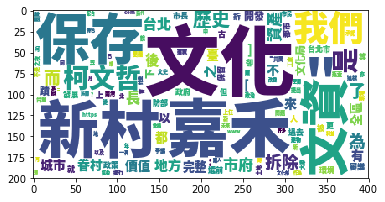

In [17]:
font = r"D:/dsc-crawling-master/Session_B/data/NotoSansCJKtc-Black.otf"
wordcloud = WordCloud(font_path=font,
                     background_color="white", # 設定背景顏色
                      max_font_size=90,        # 最大字的字體大小
                     )
wordcloud.fit_words(wordDict) 
plt.imshow(wordcloud)

## 分析結果

從文字雲當中了解到該粉專關關注的面向為文資與文化的保存

且該團體在抗爭的事情可能為政府的拆除行動

且其所在地可能為台北市，因為有多次提到'台北'及'柯文哲'

# ----------TF-IDF-------------

In [70]:

doc = []
stopwords = ['我', '對', '\n', '的', '與','及', '在', '讓', '也', '於','時','之','號']
puncs = '\/！？｡＂＃＄％＆＇[ ,，()（）#%\n＊＋，《－／?/ ：&_=-；＜＝ ]＞＠［＼］＾「！＿.｀｛。｜" :｝～」｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。0 1 2 3 4 5 6 7 8 9 zxcvbnmasdfghjklqwertyuiopZXCVBNMASDFGHJKLQWERTYUIOP'
puncs = [x for x in puncs]
jieba.del_word('我們')
jieba.del_word('可以')
jieba.del_word('許多')
jieba.del_word('受理')
jieba.del_word('認為')
jieba.del_word('認為')
jieba.add_word('性行為') 
jieba.add_word('性別教育')
jieba.add_word('同性別二人')  
jieba.add_word('同性二人')  
jieba.add_word('永久共同生活')
jieba.add_word('安定力量')
jieba.add_word('言詞辯論')
jieba.add_word('尤美女')
#讀取先前存下來的POST檔案
for i in range(7):
    posts = []
    filename = str(i)+".txt"
    f = open(filename, 'r')
    x = f.readlines()
    posts.append(x)
    
    
    flat_list = [item for sublist in posts for item in sublist]  # List of List to list 
    demo_text = ''.join(flat_list) # 將 list of string 轉變成一個大字串
    
    
    #濾除英文、標點符號、數字
    textx = ''
    for i in demo_text:
        if i not in puncs:
            textx = textx + i 
 
    doc.append(textx)
    doc = [" ".join(jieba.cut(article)) for article in doc ] #斷詞斷句
    



In [71]:
import sys
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
# tfidf
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(doc)

In [73]:
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  1425


In [74]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (7, 1425)


<7x1425 sparse matrix of type '<class 'numpy.float64'>'
	with 3298 stored elements in Compressed Sparse Row format>

In [75]:
# check each document

for i in range(len(doc)):
    print('----Document {0}----'.format(i))
    #print('-------------------------'+title[i])
    for j in range(len(words)-1):
        if tfidf[i,j] > 0.16:
              print(words[j], tfidf[i,j], i ,j)

----Document 0----
同志 0.25771108523 0 338
教育 0.178503871646 0 706
活動 0.301648251538 0 890
熱線 0.440870521479 0 924
青少年 0.533814688552 0 1394
----Document 1----
同志 0.221834950612 1 338
執政團隊 0.169006599813 1 391
婚姻 0.251456880501 1 444
平權 0.193428369616 1 529
總統 0.507019799439 1 1068
----Document 2----
伴侶 0.162407355212 2 147
司法院 0.189818804545 2 324
同志 0.182178821148 2 338
大法官 0.403364959657 2 418
憲法 0.237273505681 2 597
法庭 0.194311997498 2 878
----Document 3----
伴侶 0.172526071702 3 147
同志 0.210542962576 3 338
同性 0.191402693251 3 339
尊重 0.162036465214 3 500
法務部 0.189568026948 3 874
立法院 0.27111239839 3 1022
----Document 4----
同志 0.173969705666 4 338
婚姻 0.32866687123 4 444
平等 0.175288997989 4 530
民法 0.311135654355 4 864
適用 0.36374896446 4 1321
----Document 5----
一讀 0.173965639312 5 19
同志 0.351298606979 5 338
委員 0.193653835203 5 436
平等 0.199103999598 5 530
法案 0.197907901749 5 882
社會 0.17564930349 5 998
----Document 6----
同志 0.340818849076 6 338
同性 0.199179846863 6 339
婚姻 0.296018220947 6 44

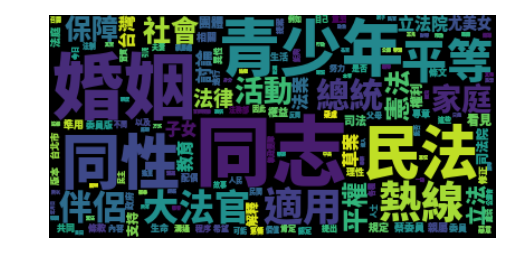

In [81]:
d = {}
for j in range(len(words)-1):
    d[words[j]] = tfidf[6,j]

font = r"D:/dsc-crawling-master/Session_B/data/NotoSansCJKtc-Black.otf"
wordcloud = WordCloud(font_path=font)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure( figsize=(8,6) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

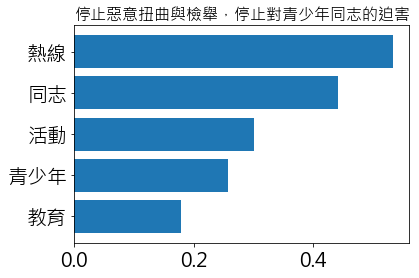

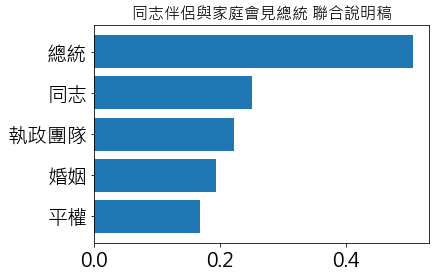

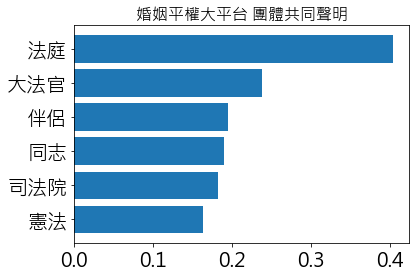

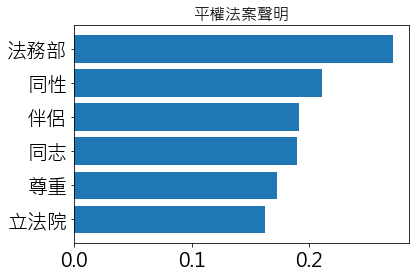

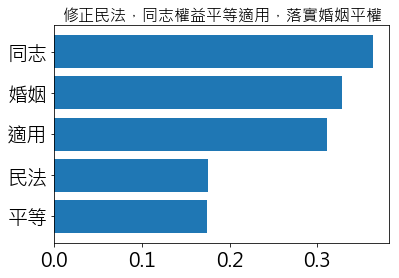

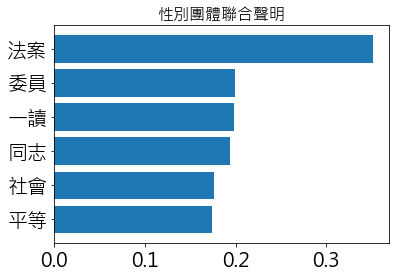

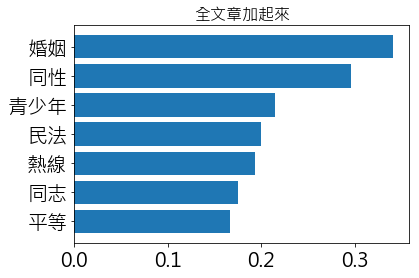

In [79]:


import matplotlib
from collections import OrderedDict
matplotlib.rcParams['font.sans-serif'] = 'Microsoft JhengHei'
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

title = ['停止惡意扭曲與檢舉，停止對青少年同志的迫害','同志伴侶與家庭會見總統 聯合說明稿','婚姻平權大平台 團體共同聲明','平權法案聲明','修正民法，同志權益平等適用，落實婚姻平權','性別團體聯合聲明','全文章加起來']

for i in range(len(doc)):
    d = {}
    for j in range(len(words)-1):
        if tfidf[i,j] > 0.16:
            d[words[j]] = tfidf[i,j]
    dd = OrderedDict(sorted(d.items(), key=lambda x: x[1]))
    X = np.arange(len(d))
    plt.title(title[i], fontsize=16)
    plt.barh(X, dd.values(), align='center')
    plt.yticks(X, d.keys())
    plt.show()


C:\Users\chenhur\Anaconda3\Lib\site-packages\matplotlib\mpl-data

我改了上述檔案的
font.sans-serif     : Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, 

font.family         : sans-serif

In [4]:

matplotlib.rcParams['font.sans-serif'] = 'Microsoft JhengHei'

In [5]:
findfont(FontProperties(family=FontProperties().get_family()))

'C:\\Program Files\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\Microsoft JhengHei.ttf'

我用這一個網址debug
https://www.jianshu.com/p/15b5189f85a3

# 把兩個tfidf  化成一系列的長條圖

# 加上一些說明的文字

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


matplotlib.rcParams['font.sans-serif'] = 'Microsoft JhengHei'


X = np.arange(len(d))
plt.barh(X, d.values(), align='center', width=0.5)
plt.xticks(X, d.keys())
ymax = max(d.values()) + 1
plt.ylim(0, ymax)
plt.show()